In [176]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
from pylab import *
from scipy.io import loadmat
from scipy.fftpack import fft, fftfreq, fftshift

In [177]:
df=pd.read_csv("Manchas.csv", header=int(0))

In [178]:
df.columns= ['Año', 'Mes', 'Año-mes', 'No de Manchas', 'X','Y','Z']

In [179]:
z = np.arange(1.0, 3214.0, 1.0)
df['Mes'] =  pd.Series(z, index =None)

In [180]:
df

,Año,Mes,Año-mes,No de Manchas,X,Y,Z
0,1749,1.0,1749.042,96.7,-1.0,-1,NaN
1,1749,2.0,1749.123,104.3,-1.0,-1,
2,1749,3.0,1749.204,116.7,-1.0,-1,
3,1749,4.0,1749.288,92.8,-1.0,-1,
4,1749,5.0,1749.371,141.7,-1.0,-1,
5,1749,6.0,1749.455,139.2,-1.0,-1,
6,1749,7.0,1749.538,158.0,-1.0,-1,
7,1749,8.0,1749.623,110.5,-1.0,-1,
8,1749,9.0,1749.707,126.5,-1.0,-1,
9,1749,10.0,1749.790,125.8,-1.0,-1,


In [181]:
df=df.drop(['Año','Año-mes','X','Y','Z'],axis=1)

In [154]:
df

,Mes,No de Manchas
0,1.0,96.7
1,2.0,104.3
2,3.0,116.7
3,4.0,92.8
4,5.0,141.7
5,6.0,139.2
6,7.0,158.0
7,8.0,110.5
8,9.0,126.5
9,10.0,125.8


In [182]:
df.dtypes

Mes              float64
No de Manchas    float64
dtype: object

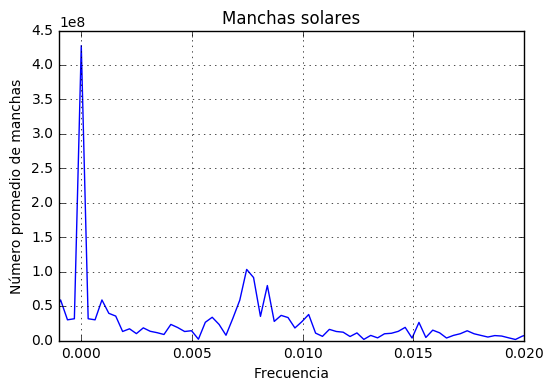

In [219]:
N = 3213
T = 1
x = df['Mes']
y = df['No de Manchas']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/2*N * np.abs(yplot))
plt.xlabel('Frecuencia')
plt.ylabel('Número promedio de manchas')
plt.title("Manchas solares")
plt.xlim(-0.001,0.02)
plt.grid()
plt.show()

In [184]:
z = np.arange(1.0, 3213.0, 1.0)

In [96]:
df['Mes'] =  pd.Series(z, index =None)

In [190]:
df.head()

,Mes,No de Manchas
0,1.0,96.7
1,2.0,104.3
2,3.0,116.7
3,4.0,92.8
4,5.0,141.7


In [224]:
a = 2*np.absolute(yf)/N
a

print(np.where(a[:,]>15))
b= a[a[:,]>15]
b

(array([   0,    3,    4,   23,   24,   25,   27, 3186, 3188, 3189, 3190,
       3209, 3210]),)


array([ 165.84712107,   22.79918361,   15.28281214,   22.67815211,
         39.98723321,   35.419832  ,   30.90803788,   30.90803788,
         35.419832  ,   39.98723321,   22.67815211,   15.28281214,
         22.79918361])

In [225]:
print( 'Primer Armónico notorio')
print('Amplitud=',2*np.absolute(yf[23,]/N))
print('frecuencia=', xf[int(1606.5 +23),])
print('periodo', 1/xf[int(1606.5+23),])

print()
print( 'Segundo Armónico notorio')
print('Amplitud=',2*np.absolute(yf[24,]/N))
print('frecuencia=', xf[int(1606.5 +24),])
print('periodo', 1/xf[int(1606.5+24),])

print()
print('Tercer Armónico notorio')
print('Amplitud=',2*np.absolute(yf[25,]/N))
print('frecuencia=', xf[int(1606.5 +25),])
print('periodo', 1/xf[int(1606.5+25),])

print()
print('Cuarto armónico notorio')
print('Amplitud=',2*np.absolute(yf[27,]/N))
print('frecuencia=', xf[int(1606.5 +27),])
print('periodo', 1/xf[int(1606.5+27),])

Primer Armónico notorio
Amplitud= 22.6781521056
frecuencia= 0.00715841892312
periodo 139.695652174

Segundo Armónico notorio
Amplitud= 39.9872332086
frecuencia= 0.00746965452848
periodo 133.875

Tercer Armónico notorio
Amplitud= 35.4198320032
frecuencia= 0.00778089013383
periodo 128.52

Cuarto armónico notorio
Amplitud= 30.9080378809
frecuencia= 0.00840336134454
periodo 119.0


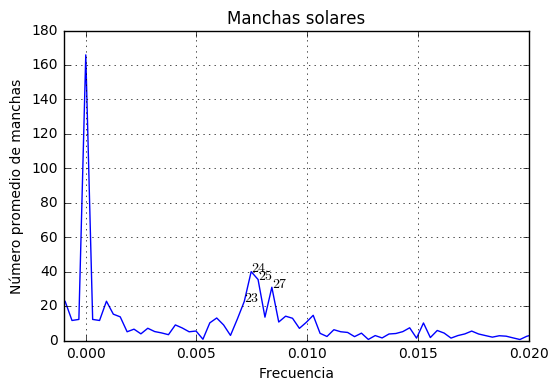

In [222]:
N = 3213
T = 1
x = df['Mes']
y = df['No de Manchas']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 2.0/N * np.abs(yplot))
plt.xlabel('Frecuencia')
plt.ylabel('Número promedio de manchas')
plt.title("Manchas solares")
plt.xlim(-0.001,0.02)
plt.text(0.00715841892312, 22.6781521056,'$23$')
plt.text(0.00746965452848, 39.9872332086,'$24$')
plt.text(0.007780890133835, 35.4198320032,'$25$')
plt.text(0.00840336134454, 30.9080378809,'$27$')

plt.grid()
plt.show()